In [1]:
x=1

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
adata = sc.read('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
adata

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [4]:
ct = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/hlca/celltypes.csv', index_col=0)
ct

,l1_celltype,l2_celltype,l3_celltype,l4_celltype,l5_celltype
CGATGTAAGTTACGGG_SC10,Immune,Myeloid,Macrophages,Alveolar macrophages,None
ATTCTACCAAGGTTCT_HD68,Endothelial,Blood vessels,EC capillary,EC aerocyte capillary,None
P1_2_TGCTGCTAGCTCCTCT,Immune,Myeloid,Macrophages,Alveolar macrophages,None
CTGATAGTCTTAGAGC_F01367,Endothelial,Blood vessels,EC arterial,None,None
D344_Brus_Dis1_CATTCGCGTGCCTGCA-1-14,Epithelial,Airway epithelium,Secretory,Club,Club (non-nasal)
...,...,...,...,...,...
SC25_CGTGTCTTCTGCAGTA_reyfman_disease,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages
TTGTGGATCGTTCCTG_5-PX5-sub_mould,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages
022C-b_GGATGTTTCCAAGTAC_adams,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages


In [5]:
adata.obs = adata.obs.join(ct)
adata

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [6]:
DONOR = 'sample'
CELLTYPE = 'l2_celltype'
CONDITION = 'lung_condition_coarse'

n_splits = 5

sorted_conditions = sorted(adata.obs[CONDITION].cat.categories.values)
CONDITION_MAP = {name: i for i, name in enumerate(sorted_conditions)} 

In [7]:
adata.obs[CELLTYPE] = adata.obs[CELLTYPE].astype('str')
adata.obs[CELLTYPE] = adata.obs[CELLTYPE].astype('category')

# Create frequency vectors

In [8]:
def create_frequency_dataset(adata, celltype=CELLTYPE, donor=DONOR, condition=CONDITION, standartize=True):
    df = adata.obs[[celltype, donor]].groupby([celltype, donor]).size().reset_index(name='count')
    # df = df[df[celltype] != 'Unknown']
    
    X = []
    y = []

    for sample in df[donor].unique():
        df_sample = df[df[donor] == sample]
        df_sample = df_sample.sort_values(celltype)
        X.append(df_sample['count'].values)
        y.append(CONDITION_MAP[adata[adata.obs[donor] == sample].obs[CONDITION][0]])

    X = np.array(X)
    y = np.array(y)

    # drop donors with less than 10 cells in total
    idx = np.argwhere(np.all(X[..., :] <= 10, axis=0))
    X = np.delete(X, idx, axis=0)
    y = np.delete(y, idx)
    
    if standartize is True:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    return X, y

# Multiclass regression

In [9]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from scipy.special import logsumexp

In [10]:
def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(logsumexp(Z, axis=1)))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=2000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

In [11]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    train = adata[adata.obs[f'split{i}'] == 'train'].copy()
    val = adata[adata.obs[f'split{i}'] == 'val'].copy()
    # train data
    X_train, y_train = create_frequency_dataset(train, standartize=True)
    print("Train shapes:")
    print(f"x.shape = {X_train.shape}")
    print(f"y.shape = {y_train.shape}")
    # val data
    X_val, y_val = create_frequency_dataset(val, standartize=True)
    print("Val shapes:")
    print(f"x_val.shape = {X_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = X_train
    Y = y_train
    model = Multiclass()
    model.fit(X, Y)
    print(f'Train accuracy = {np.sum(model.predict(X) == Y)/len(Y)}.')
    val_accuracy = np.sum(model.predict(X_val) == y_val)/len(y_val)
    val_accuracies.append(val_accuracy)
    print(f'Val accuracy = {val_accuracy}.')
    print('===========================')

print(f"Mean validation accuracy across 5 CV splits for a multiclass regression model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.5026455026455027.
Val accuracy = 0.5177304964539007.
Processing split = 1...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.5238095238095238.
Val accuracy = 0.45390070921985815.
Processing split = 2...
Train shapes:
x.shape = (566, 11)
y.shape = (566,)
Val shapes:
x_val.shape = (142, 11)
y_val.shape = (142,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.5123674911660777.
Val accuracy = 0.4788732394366197.
Processing split = 3...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.527336860670194.
Val accuracy = 0.48936170212765956.
Processing split = 4...
Train shapes:
x.shape = (568, 11)
y.shape = (568,)
Val shapes:
x_val.shape = (139, 11)
y_val.shape = (139,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.4859154929577465.
Val accuracy = 0.5323741007194245.
Mean validation accuracy across 5 CV splits for a multiclass regression model = 0.4944480495914926.


### Do not standartize

In [12]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    train = adata[adata.obs[f'split{i}'] == 'train'].copy()
    val = adata[adata.obs[f'split{i}'] == 'val'].copy()
    # train data
    X_train, y_train = create_frequency_dataset(train, standartize=False)
    print("Train shapes:")
    print(f"x.shape = {X_train.shape}")
    print(f"y.shape = {y_train.shape}")
    # val data
    X_val, y_val = create_frequency_dataset(val, standartize=False)
    print("Val shapes:")
    print(f"x_val.shape = {X_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = X_train
    Y = y_train
    model = Multiclass()
    model.fit(X, Y)
    print(f'Train accuracy = {np.sum(model.predict(X) == Y)/len(Y)}.')
    val_accuracy = np.sum(model.predict(X_val) == y_val)/len(y_val)
    val_accuracies.append(val_accuracy)
    print(f'Val accuracy = {val_accuracy}.')
    print('===========================')

print(f"Mean validation accuracy across 5 CV splits for a multiclass regression model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.5978835978835979.
Val accuracy = 0.5957446808510638.
Processing split = 1...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.2804232804232804.
Val accuracy = 0.28368794326241137.
Processing split = 2...
Train shapes:
x.shape = (566, 11)
y.shape = (566,)
Val shapes:
x_val.shape = (142, 11)
y_val.shape = (142,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.24734982332155478.
Val accuracy = 0.2605633802816901.
Processing split = 3...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.6102292768959435.
Val accuracy = 0.5531914893617021.
Processing split = 4...
Train shapes:
x.shape = (568, 11)
y.shape = (568,)
Val shapes:
x_val.shape = (139, 11)
y_val.shape = (139,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 0.40316901408450706.
Val accuracy = 0.4460431654676259.
Mean validation accuracy across 5 CV splits for a multiclass regression model = 0.4278461318448986.


# NN

In [22]:
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from random import sample
import math
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [24]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        if x.shape[0] > 1:
            x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.layer_out(x)
        
        return x

In [25]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [26]:
EPOCHS = 500
BATCH_SIZE = 4
LEARNING_RATE = 0.00005
NUM_FEATURES = len(adata.obs[CELLTYPE].cat.categories)
NUM_CLASSES = len(adata.obs[CONDITION].cat.categories)
TRAIN_FRACTION = 0.8

Processing split = 0...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.64518 | Val Loss: 1.55170 | Train Acc: 77.412| Val Acc: 59.292
Accuracy on the test set = 0.6170212765957447.
Processing split = 1...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.65424 | Val Loss: 1.69170 | Train Acc: 78.728| Val Acc: 48.673
Accuracy on the test set = 0.5886524822695035.
Processing split = 2...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (566, 11)
y.shape = (566,)
Val shapes:
x_val.shape = (142, 11)
y_val.shape = (142,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.63926 | Val Loss: 1.67303 | Train Acc: 78.070| Val Acc: 42.478
Accuracy on the test set = 0.3591549295774648.
Processing split = 3...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.58434 | Val Loss: 1.61646 | Train Acc: 82.675| Val Acc: 50.442
Accuracy on the test set = 0.5177304964539007.
Processing split = 4...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (568, 11)
y.shape = (568,)
Val shapes:
x_val.shape = (139, 11)
y_val.shape = (139,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.68701 | Val Loss: 1.51897 | Train Acc: 75.509| Val Acc: 58.407
Accuracy on the test set = 0.5971223021582733.
Mean validation accuracy across 5 CV splits for a NN model = 0.5359362974109774.


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

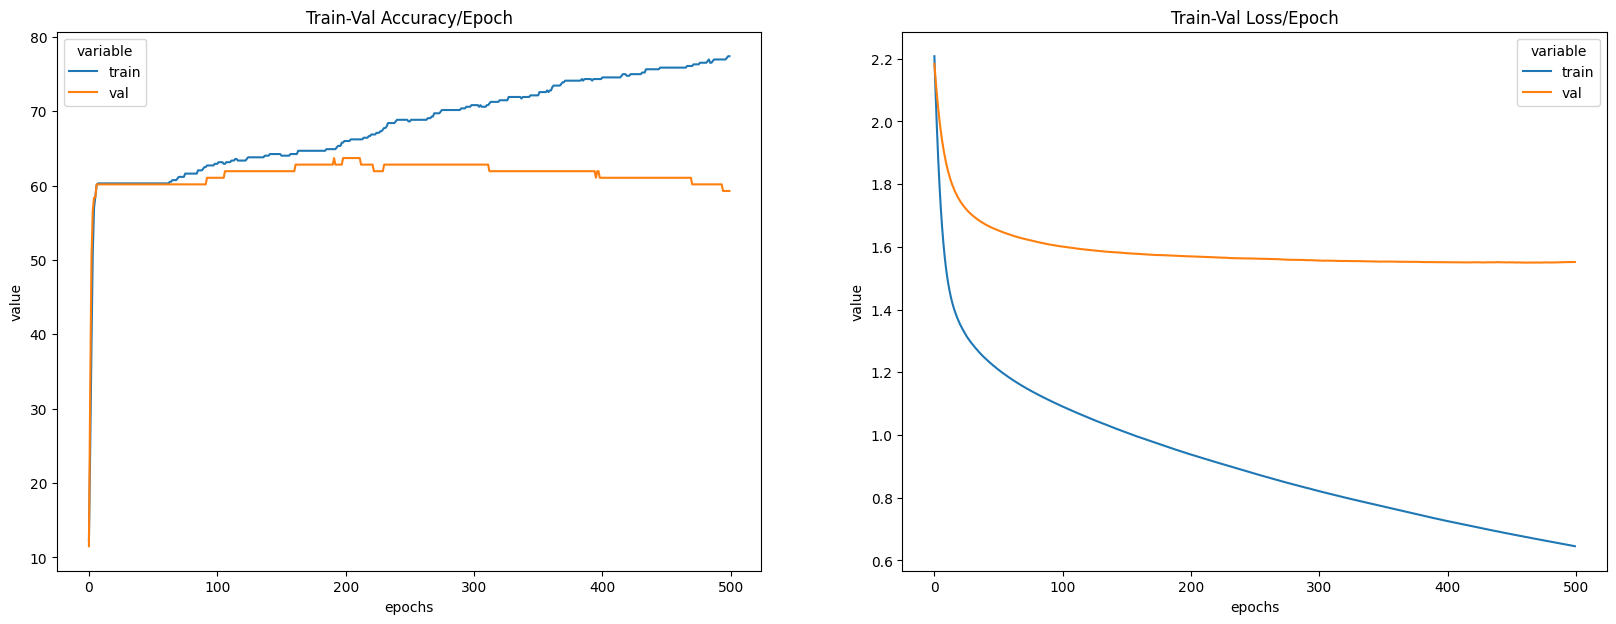

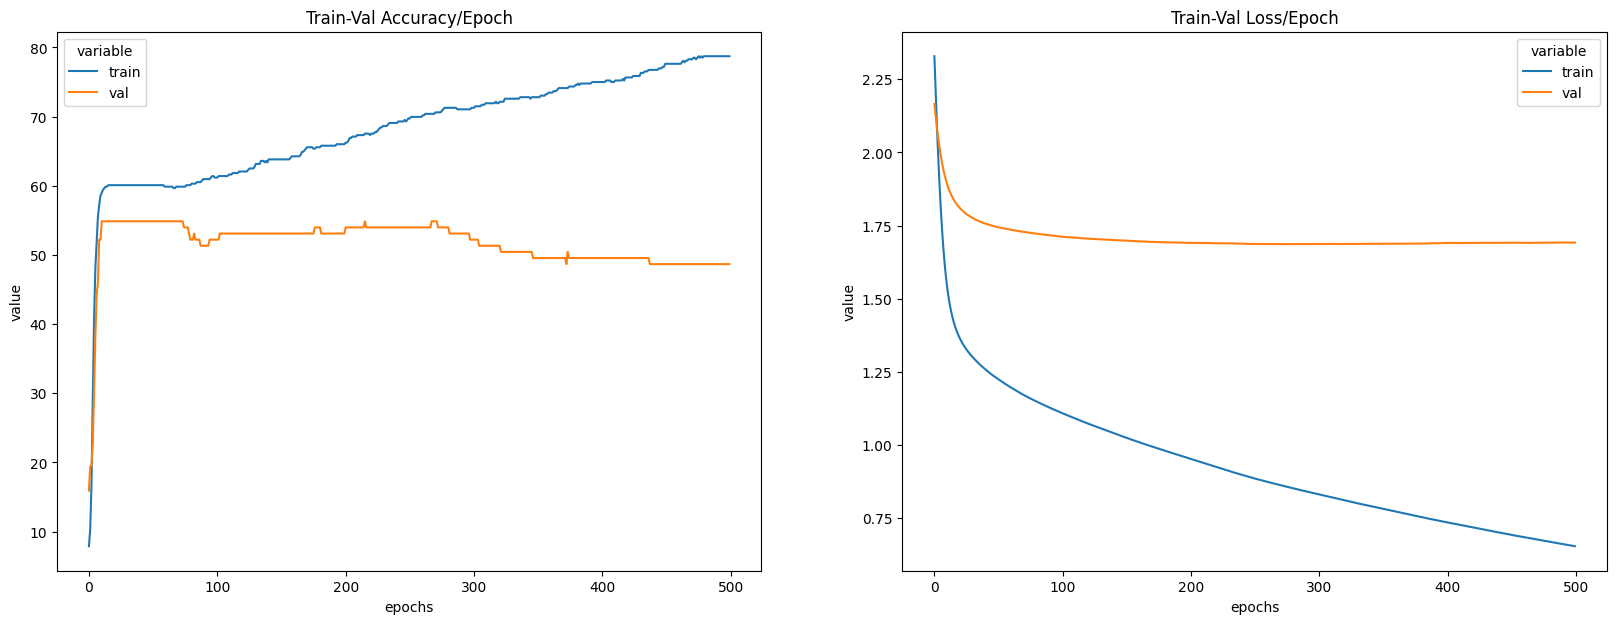

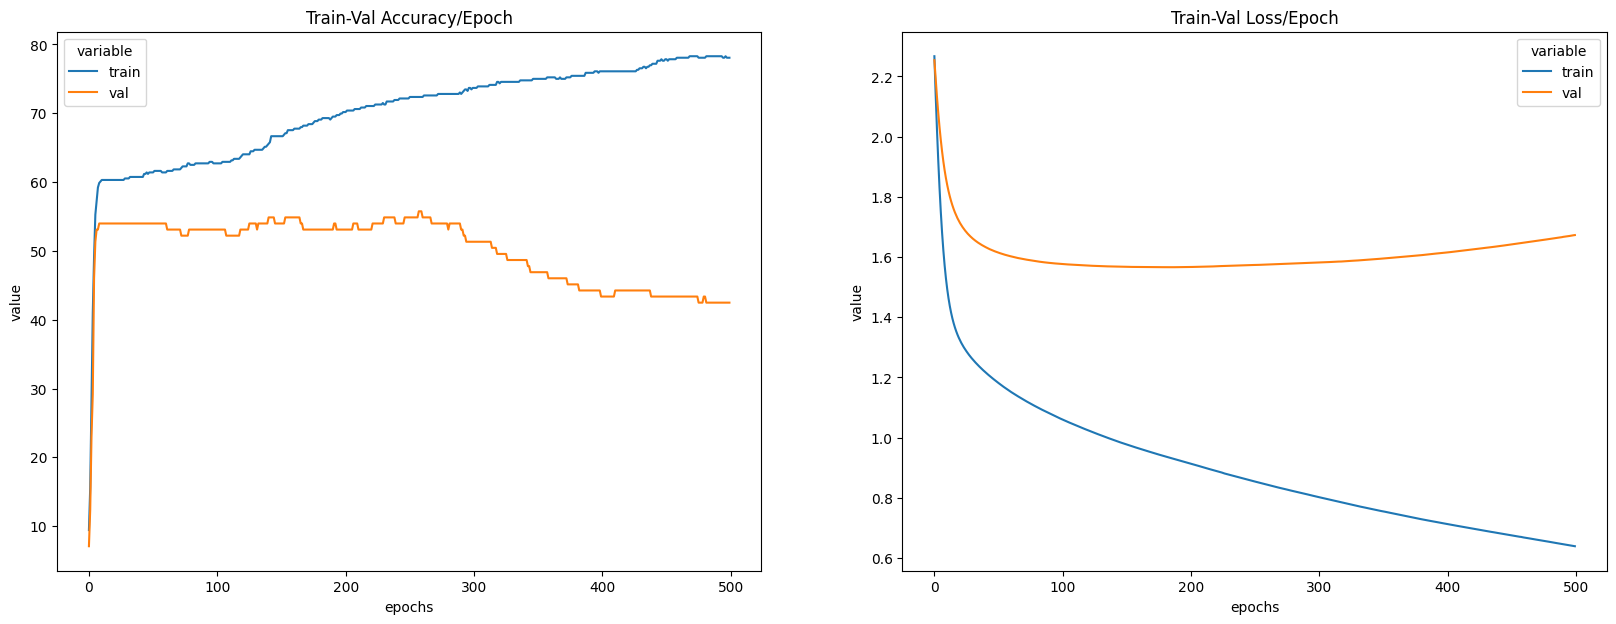

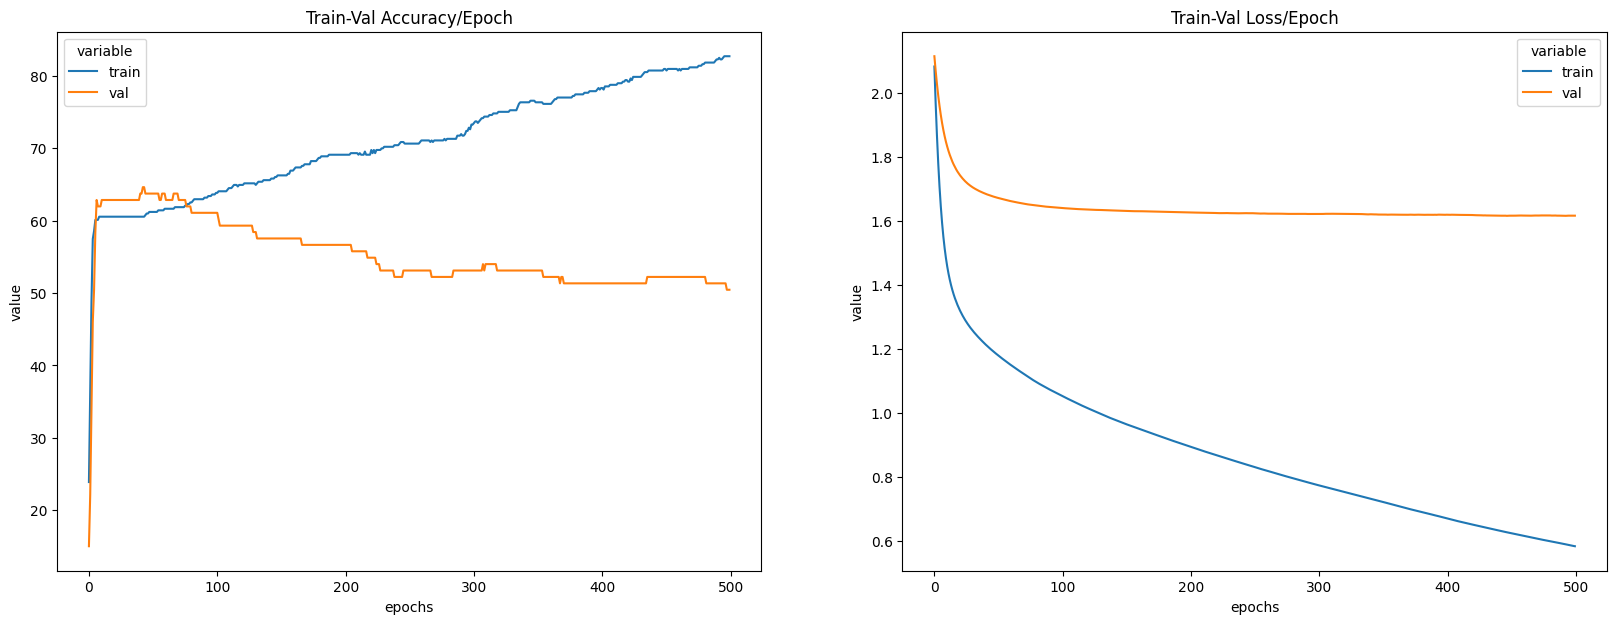

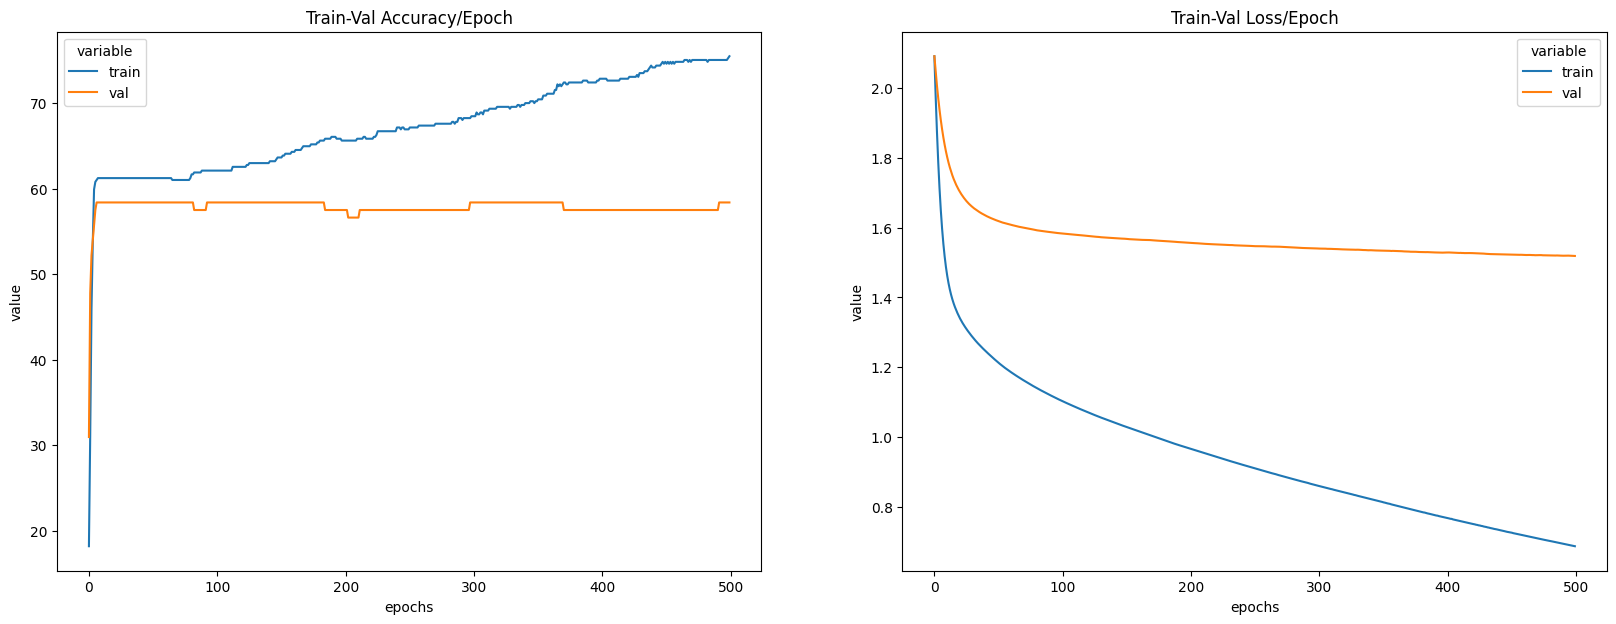

In [27]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    train = adata[adata.obs[f'split{i}'] == 'train'].copy()
    val = adata[adata.obs[f'split{i}'] == 'val'].copy()
    # train data
    x, y = create_frequency_dataset(train, standartize=True)
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data
    x_val, y_val = create_frequency_dataset(val, standartize=True)
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    n_of_train_samples = int(math.ceil(len(y) * TRAIN_FRACTION))
    train_samples = sample(range(len(y)), n_of_train_samples)
    val_samples = [i for i in range(len(y)) if i not in train_samples]
    X_test = x_val
    y_test = y_val
    X_train = x[train_samples]
    y_train = y[train_samples]
    X_val = x[val_samples]
    y_val = y[val_samples]
    
    # create datasets
    train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
    val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
    test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
    
    # create loaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE)
    val_loader = DataLoader(dataset=val_dataset, batch_size=1)
    test_loader = DataLoader(dataset=test_dataset, batch_size=1)
    
    # init model
    model = MulticlassClassification(num_feature=NUM_FEATURES, num_class=NUM_CLASSES)
    # define loss
    criterion = nn.CrossEntropyLoss()
    # define optimizer
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # loss recoder
    accuracy_stats = {
        'train': [],
        "val": []
    }
    loss_stats = {
        'train': [],
        "val": []
    }
    
    # train
    print("Begin training.")
    for e in tqdm(range(1, EPOCHS+1)):

        # TRAINING
        train_epoch_loss = 0
        train_epoch_acc = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch, y_train_batch
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)

            train_loss = criterion(y_train_pred, y_train_batch)
            train_acc = multi_acc(y_train_pred, y_train_batch)

            train_loss.backward()
            optimizer.step()

            train_epoch_loss += train_loss.item()
            train_epoch_acc += train_acc.item()


        # VALIDATION    
        with torch.no_grad():

            val_epoch_loss = 0
            val_epoch_acc = 0

            model.eval()
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch, y_val_batch

                y_val_pred = model(X_val_batch)

                val_loss = criterion(y_val_pred, y_val_batch)
                val_acc = multi_acc(y_val_pred, y_val_batch)

                val_epoch_loss += val_loss.item()
                val_epoch_acc += val_acc.item()

        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))


    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
    
    # losses
    # Create dataframes
    train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    # Plot the dataframes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')
    
    # predict
    y_pred_list = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in test_loader:
            X_batch = X_batch
            y_test_pred = model(X_batch)
            _, y_pred_tags = torch.max(y_test_pred, dim = 1)
            y_pred_list.append(y_pred_tags.cpu().numpy())
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    
    df = classification_report(y_test, y_pred_list, output_dict=True)
    val_accuracies.append(df['accuracy'])
    print(f'Accuracy on the test set = {df["accuracy"]}.')
    print('===========================')
    
print(f"Mean validation accuracy across 5 CV splits for a NN model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.86405 | Val Loss: 73.55631 | Train Acc: 69.737| Val Acc: 44.248


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Accuracy on the test set = 0.45390070921985815.
Processing split = 1...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.79933 | Val Loss: 189.39294 | Train Acc: 73.246| Val Acc: 39.823
Accuracy on the test set = 0.49645390070921985.
Processing split = 2...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (566, 11)
y.shape = (566,)
Val shapes:
x_val.shape = (142, 11)
y_val.shape = (142,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.79889 | Val Loss: 268.14078 | Train Acc: 71.711| Val Acc: 40.708
Accuracy on the test set = 0.34507042253521125.
Processing split = 3...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.87977 | Val Loss: 122.93855 | Train Acc: 70.614| Val Acc: 41.593
Accuracy on the test set = 0.3829787234042553.
Processing split = 4...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Train shapes:
x.shape = (568, 11)
y.shape = (568,)
Val shapes:
x_val.shape = (139, 11)
y_val.shape = (139,)
Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 500: | Train Loss: 0.86707 | Val Loss: 205.65910 | Train Acc: 69.228| Val Acc: 21.239
Accuracy on the test set = 0.2158273381294964.
Mean validation accuracy across 5 CV splits for a NN model = 0.37884621879960817.


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

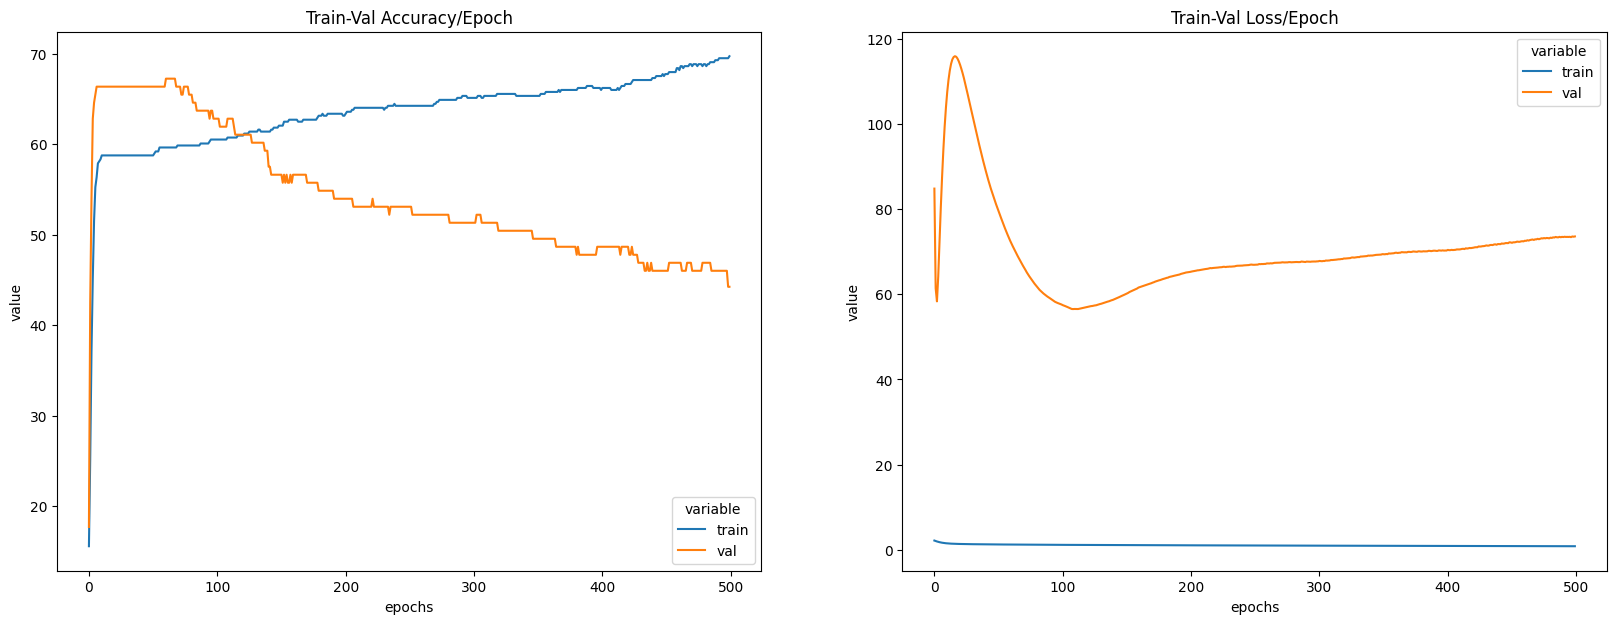

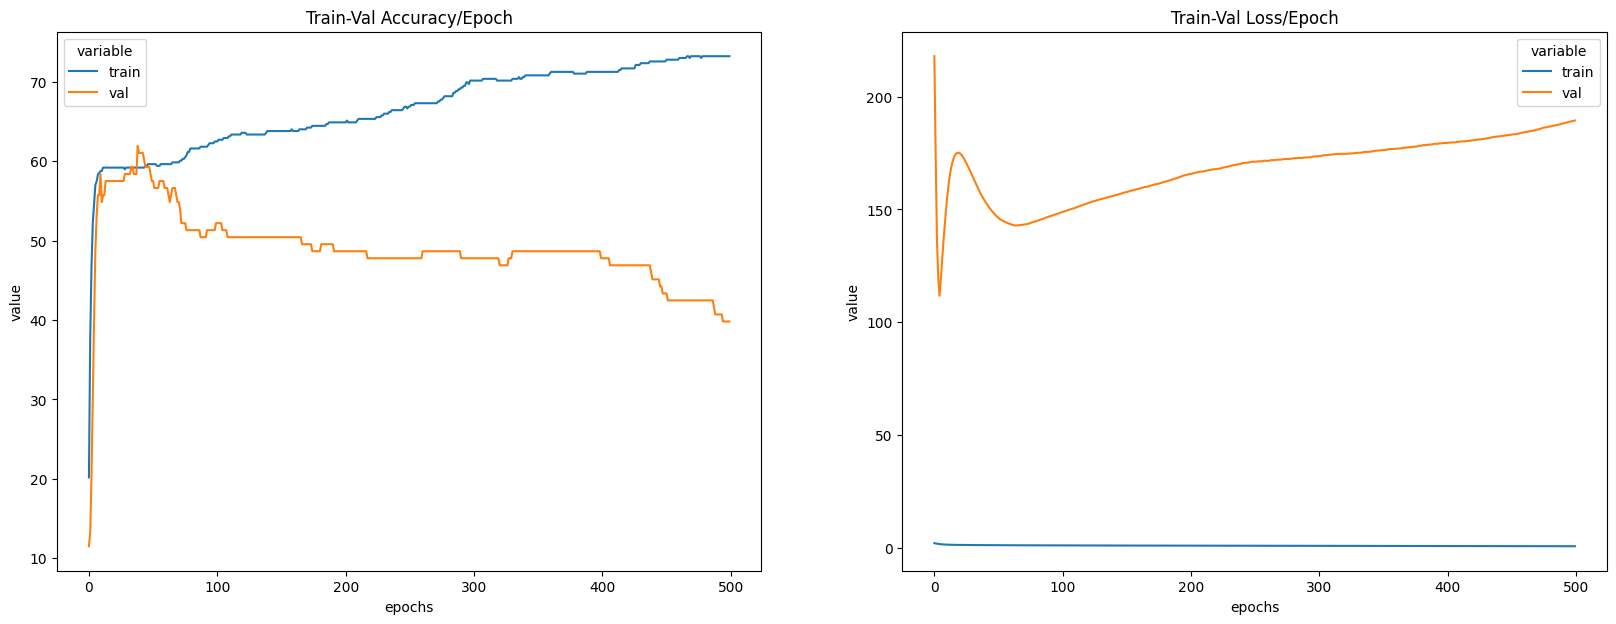

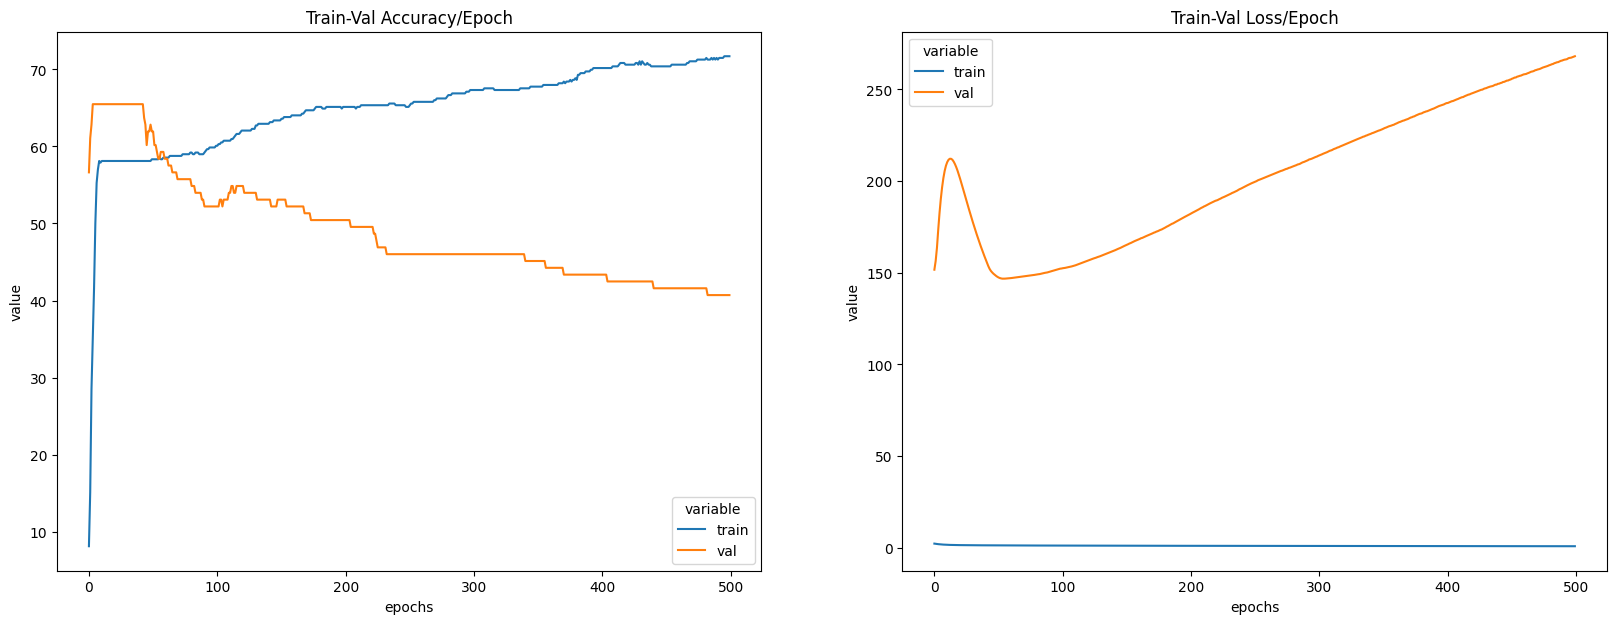

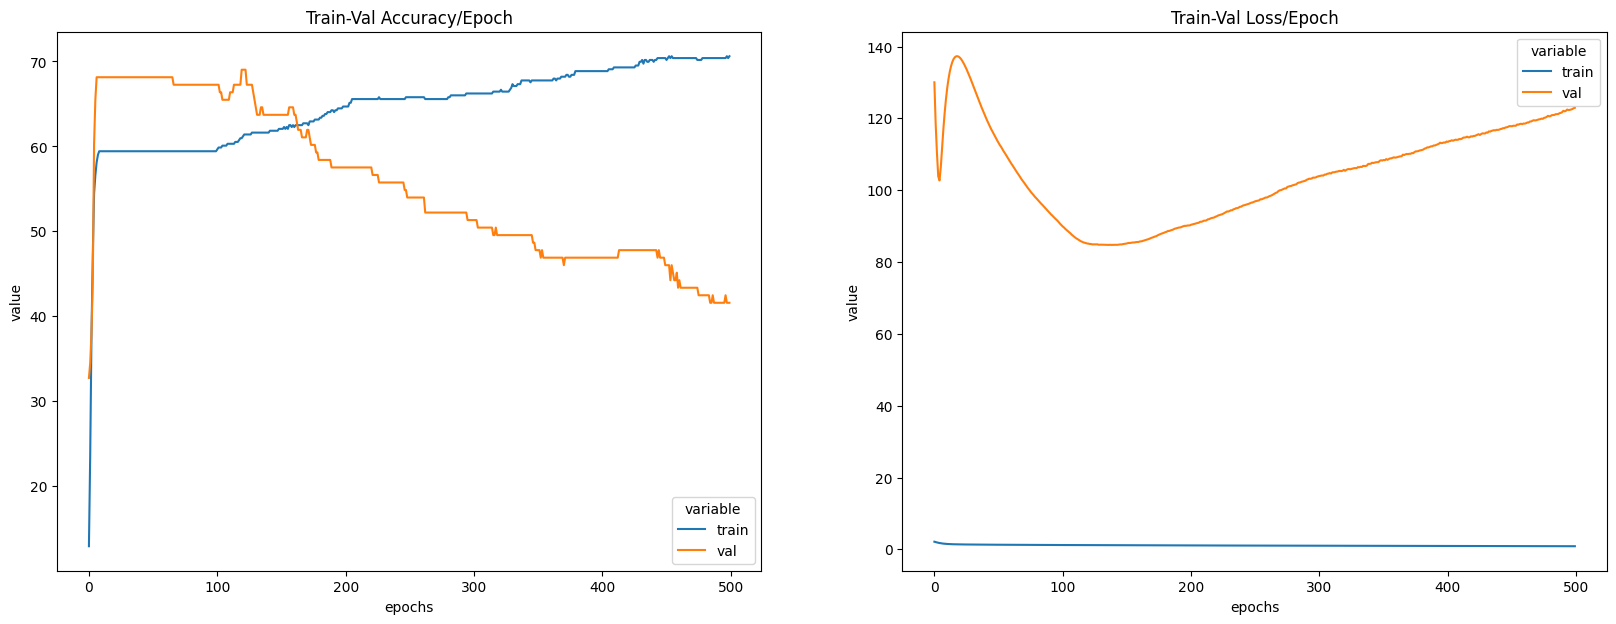

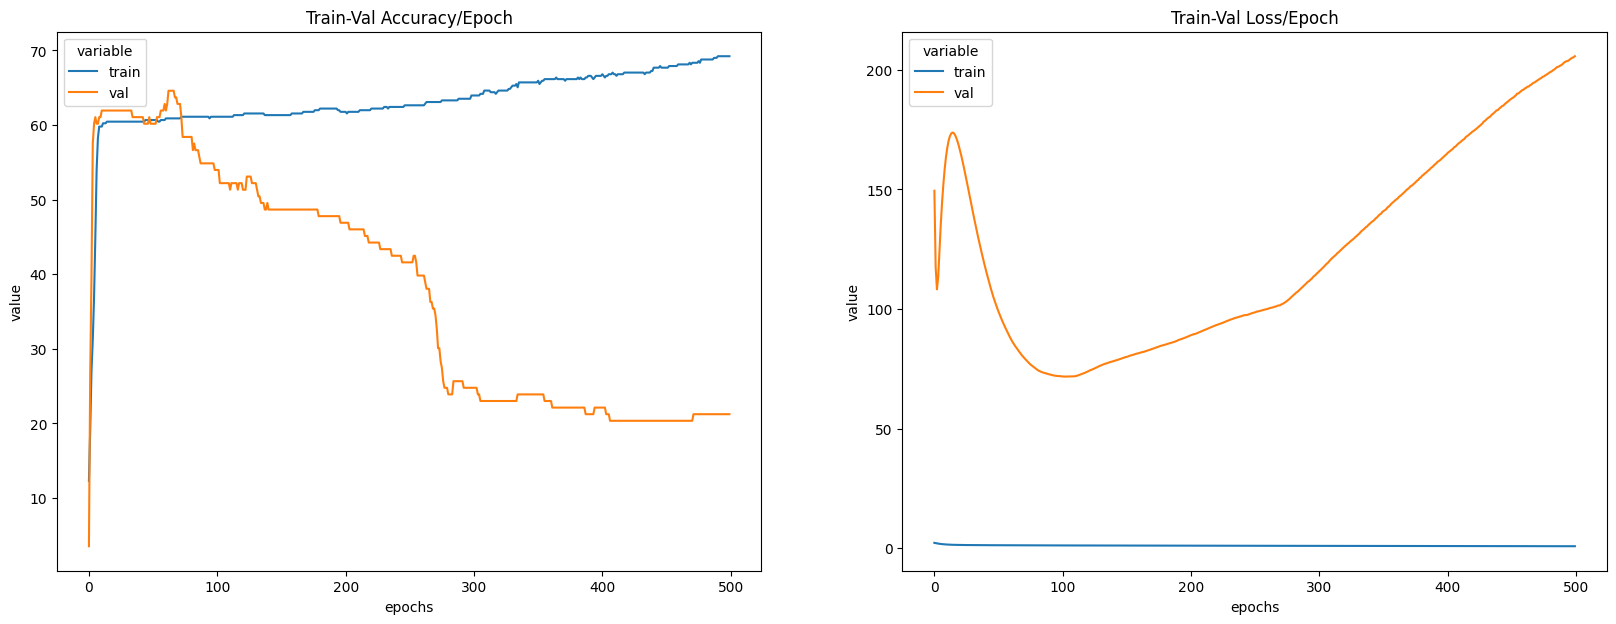

In [28]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    train = adata[adata.obs[f'split{i}'] == 'train'].copy()
    val = adata[adata.obs[f'split{i}'] == 'val'].copy()
    # train data
    x, y = create_frequency_dataset(train, standartize=False)
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data
    x_val, y_val = create_frequency_dataset(val, standartize=False)
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    n_of_train_samples = int(math.ceil(len(y) * TRAIN_FRACTION))
    train_samples = sample(range(len(y)), n_of_train_samples)
    val_samples = [i for i in range(len(y)) if i not in train_samples]
    X_test = x_val
    y_test = y_val
    X_train = x[train_samples]
    y_train = y[train_samples]
    X_val = x[val_samples]
    y_val = y[val_samples]
    
    # create datasets
    train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
    val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
    test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
    
    # create loaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE)
    val_loader = DataLoader(dataset=val_dataset, batch_size=1)
    test_loader = DataLoader(dataset=test_dataset, batch_size=1)
    
    # init model
    model = MulticlassClassification(num_feature=NUM_FEATURES, num_class=NUM_CLASSES)
    # define loss
    criterion = nn.CrossEntropyLoss()
    # define optimizer
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # loss recoder
    accuracy_stats = {
        'train': [],
        "val": []
    }
    loss_stats = {
        'train': [],
        "val": []
    }
    
    # train
    print("Begin training.")
    for e in tqdm(range(1, EPOCHS+1)):

        # TRAINING
        train_epoch_loss = 0
        train_epoch_acc = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch, y_train_batch
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)

            train_loss = criterion(y_train_pred, y_train_batch)
            train_acc = multi_acc(y_train_pred, y_train_batch)

            train_loss.backward()
            optimizer.step()

            train_epoch_loss += train_loss.item()
            train_epoch_acc += train_acc.item()


        # VALIDATION    
        with torch.no_grad():

            val_epoch_loss = 0
            val_epoch_acc = 0

            model.eval()
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch, y_val_batch

                y_val_pred = model(X_val_batch)

                val_loss = criterion(y_val_pred, y_val_batch)
                val_acc = multi_acc(y_val_pred, y_val_batch)

                val_epoch_loss += val_loss.item()
                val_epoch_acc += val_acc.item()

        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))


    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
    
    # losses
    # Create dataframes
    train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    # Plot the dataframes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')
    
    # predict
    y_pred_list = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in test_loader:
            X_batch = X_batch
            y_test_pred = model(X_batch)
            _, y_pred_tags = torch.max(y_test_pred, dim = 1)
            y_pred_list.append(y_pred_tags.cpu().numpy())
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    
    df = classification_report(y_test, y_pred_list, output_dict=True)
    val_accuracies.append(df['accuracy'])
    print(f'Accuracy on the test set = {df["accuracy"]}.')
    print('===========================')
    
print(f"Mean validation accuracy across 5 CV splits for a NN model = {np.mean(np.array(val_accuracies))}.")

# Random forest

Adjusted from https://www.datacamp.com/tutorial/random-forests-classifier-python.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    train = adata[adata.obs[f'split{i}'] == 'train'].copy()
    val = adata[adata.obs[f'split{i}'] == 'val'].copy()
    # train data
    x, y = create_frequency_dataset(train, standartize=False)
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data
    x_val, y_val = create_frequency_dataset(val, standartize=False)
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X, Y)
    print(f'Train accuracy = {np.sum(clf.predict(X) == Y)/len(Y)}.')
    y_pred = clf.predict(x_val)
    val_accuracy = np.sum(clf.predict(x_val) == y_val)/len(y_val)
    val_accuracies.append(val_accuracy)
    print(f'Val accuracy = {val_accuracy}.')
    print('===========================')

print(f"Mean validation accuracy across 5 CV splits for a random forest model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.7304964539007093.
Processing split = 1...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.7446808510638298.
Processing split = 2...
Train shapes:
x.shape = (566, 11)
y.shape = (566,)
Val shapes:
x_val.shape = (142, 11)
y_val.shape = (142,)
Train accuracy = 1.0.
Val accuracy = 0.7323943661971831.
Processing split = 3...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.6879432624113475.
Processing split = 4...
Train shapes:
x.shape = (568, 11)
y.shape = (568,)
Val shapes:
x_val.shape = (139, 11)
y_val.shape = (139,)
Train accuracy = 1.0.
Val accuracy = 0.7122302158273381.
Mean validation accuracy across 5 CV splits for a rando

In [21]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    train = adata[adata.obs[f'split{i}'] == 'train'].copy()
    val = adata[adata.obs[f'split{i}'] == 'val'].copy()
    # train data
    x, y = create_frequency_dataset(train, standartize=True)
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data
    x_val, y_val = create_frequency_dataset(val, standartize=True)
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X, Y)
    print(f'Train accuracy = {np.sum(clf.predict(X) == Y)/len(Y)}.')
    y_pred = clf.predict(x_val)
    val_accuracy = np.sum(clf.predict(x_val) == y_val)/len(y_val)
    val_accuracies.append(val_accuracy)
    print(f'Val accuracy = {val_accuracy}.')
    print('===========================')

print(f"Mean validation accuracy across 5 CV splits for a random forest model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.6170212765957447.
Processing split = 1...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.6737588652482269.
Processing split = 2...
Train shapes:
x.shape = (566, 11)
y.shape = (566,)
Val shapes:
x_val.shape = (142, 11)
y_val.shape = (142,)
Train accuracy = 1.0.
Val accuracy = 0.6338028169014085.
Processing split = 3...
Train shapes:
x.shape = (567, 11)
y.shape = (567,)
Val shapes:
x_val.shape = (141, 11)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.6028368794326241.
Processing split = 4...
Train shapes:
x.shape = (568, 11)
y.shape = (568,)
Val shapes:
x_val.shape = (139, 11)
y_val.shape = (139,)
Train accuracy = 1.0.
Val accuracy = 0.6187050359712231.
Mean validation accuracy across 5 CV splits for a rando